In [2]:

# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv("C://Users//VIPATI//Downloads//archive//yelp.csv")
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)
# COLUMN NAMES
print("Column names:")
print(data.columns)
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())
# DATASET SUMMARY
data.describe(include='all')

Shape of the dataset:
(10000, 10)
Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object
Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


In [4]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['text_len'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

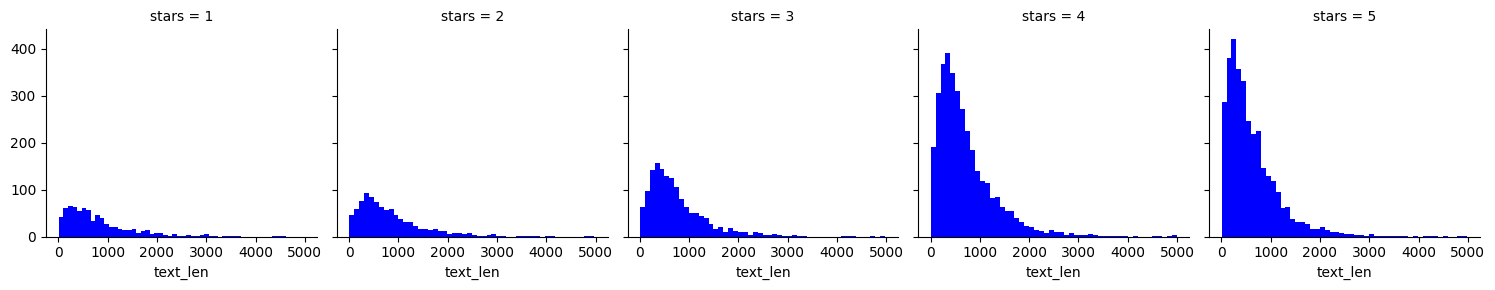

In [5]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'text_len',bins=50,color='blue')

Observation: More the star rating, lesser is the length and vice versa

In [8]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars')[['useful', 'funny', 'cool', "text_len"]].mean()
stval

,useful,funny,cool,text_len
stars,,,,
1,1.604806,1.056075,0.576769,826.515354
2,1.563107,0.875944,0.719525,842.256742
3,1.306639,0.694730,0.788501,758.498289
4,1.395916,0.670448,0.954623,712.923142
5,1.381780,0.608631,0.944261,624.999101


In [9]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

,useful,funny,cool,text_len
useful,1.000000,0.894506,-0.743329,0.699881
funny,0.894506,1.000000,-0.944939,0.843461
cool,-0.743329,-0.944939,1.000000,-0.857664
text_len,0.699881,0.843461,-0.857664,1.000000


observation: positive correlation between useful &funny | useful & text_len | funny_text_len

In [10]:
# Count number of reviews for each star rating
star_counts = data['stars'].value_counts().sort_index()

print(star_counts)

stars
1     749
2     927
3    1461
4    3526
5    3337
Name: count, dtype: int64


Observation: data looks balanced

### Why Select Only 1, 3, and 5 Star Reviews for Classification

Yelp reviews have **5 star ratings (1 to 5)**.  

Often in **sentiment analysis** or **text classification**, it is common to focus on the **extreme classes** (negative, neutral, positive) rather than all 5 stars.

**Mapping of selected stars:**

- **1 star → Very Negative**  
- **3 star → Neutral**  
- **5 star → Very Positive**

This approach **reduces ambiguity** and makes models easier to train.

---

**Class Balance Consideration:**

- Middle ratings (2 and 4 stars) are often fewer or harder to classify clearly.  
- Excluding them can prevent **noisy labels** and improve model performance.

---

**Multi-c**


In [11]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(5547, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


# Data Cleaning

In [12]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Vectorization

In [14]:
! pip install gensim
from gensim.models import Word2Vec
import numpy as np

# Assuming 'text_process' is your preprocessing function that tokenizes text
tokenized_reviews = x.apply(text_process)

# Train Word2Vec on your reviews
w2v_model = Word2Vec(
    sentences=tokenized_reviews,  # list of tokenized reviews
    vector_size=25,              # dimensionality of word vectors
    window=5,                     # context window
    min_count=2,                  # ignore rare words
    workers=4,                    # parallel workers
    seed=42
)

# Function to convert a review into a vector by averaging its word vectors
def review_to_vec(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) == 0:  # If none of the words are in the vocab
        return np.zeros(model.vector_size)
    return np.mean(vecs, axis=0)

# Example: convert the first review to a Word2Vec vector
r0_tokens = text_process(x.iloc[0])
r0_vec = review_to_vec(r0_tokens, w2v_model)

print("Original review:")
print(x.iloc[0])
print("\nWord2Vec vector (shape {}):".format(r0_vec.shape))
print(r0_vec)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Original review:
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

Word2Vec vector (shape (25,)):
[ 0.06123221 -1.1060417  -0.2615774  -0.2608015  -0.33170038 

In [18]:
X_vectors = np.array([review_to_vec(tokens, w2v_model) for tokens in tokenized_reviews])


In [20]:
# Step 4: Train/test split
x_train, x_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

# Modelling
## 1) Random Forest

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 40  27  84]
 [ 20  88 201]
 [ 15  44 591]]
Score: 64.77
Classification Report:               precision    recall  f1-score   support

           1       0.53      0.26      0.35       151
           3       0.55      0.28      0.38       309
           5       0.67      0.91      0.77       650

    accuracy                           0.65      1110
   macro avg       0.59      0.49      0.50      1110
weighted avg       0.62      0.65      0.61      1110



## 2)Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 58  40  53]
 [ 35 115 159]
 [ 75 128 447]]
Score: 55.86
Classification Report:               precision    recall  f1-score   support

           1       0.35      0.38      0.36       151
           3       0.41      0.37      0.39       309
           5       0.68      0.69      0.68       650

    accuracy                           0.56      1110
   macro avg       0.48      0.48      0.48      1110
weighted avg       0.56      0.56      0.56      1110



## 3) SVM

In [24]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[  2   0 149]
 [  0   0 309]
 [  0   0 650]]
Score: 58.74
Classification Report:               precision    recall  f1-score   support

           1       1.00      0.01      0.03       151
           3       0.00      0.00      0.00       309
           5       0.59      1.00      0.74       650

    accuracy                           0.59      1110
   macro avg       0.53      0.34      0.26      1110
weighted avg       0.48      0.59      0.44      1110



c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

## 4)Gradient Boosting Classifier

In [25]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 48  36  67]
 [ 24  99 186]
 [ 23  48 579]]
Score: 65.41
Classification Report:               precision    recall  f1-score   support

           1       0.51      0.32      0.39       151
           3       0.54      0.32      0.40       309
           5       0.70      0.89      0.78       650

    accuracy                           0.65      1110
   macro avg       0.58      0.51      0.52      1110
weighted avg       0.63      0.65      0.62      1110



## 5) KNN

In [26]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 39  31  81]
 [ 23 107 179]
 [ 28  78 544]]
Score:  62.16
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.26      0.32       151
           3       0.50      0.35      0.41       309
           5       0.68      0.84      0.75       650

    accuracy                           0.62      1110
   macro avg       0.54      0.48      0.49      1110
weighted avg       0.59      0.62      0.60      1110



## 6) XGBoost Classifier

In [33]:
# Map stars to 0, 1, 2
label_mapping = {1: 0, 3: 1, 5: 2}
y_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train XGBoost
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(x_train, y_mapped)

# Predict
pred_xgb = xgb.predict(x_test)

# Reverse mapping to original stars if needed
reverse_mapping = {0: 1, 1: 3, 2: 5}
pred_stars = [reverse_mapping[p] for p in pred_xgb]

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, pred_stars))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_stars))
print("Classification Report:")
print(classification_report(y_test,pred_stars))


c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [02:27:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.654054054054054
Confusion Matrix:
 [[ 48  41  62]
 [ 19 107 183]
 [ 21  58 571]]
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.32      0.40       151
           3       0.52      0.35      0.42       309
           5       0.70      0.88      0.78       650

    accuracy                           0.65      1110
   macro avg       0.59      0.51      0.53      1110
weighted avg       0.63      0.65      0.63      1110



## 7) Multilayer perceptron classifier

In [34]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 76  30  45]
 [ 31 137 141]
 [ 39  63 548]]
Score: 68.56
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.50      0.51       151
           3       0.60      0.44      0.51       309
           5       0.75      0.84      0.79       650

    accuracy                           0.69      1110
   macro avg       0.62      0.60      0.60      1110
weighted avg       0.67      0.69      0.67      1110



c:\Users\VIPATI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Assuming 'text_process' is your tokenization/preprocessing function
pr = data['text'][0]
print(pr)
print("Actual Rating: ", data['stars'][0])

# Tokenize the review
tokens = text_process(pr)

# Convert to Word2Vec vector (average of word vectors)
def review_to_vec(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vecs, axis=0)

pr_vec = review_to_vec(tokens, w2v_model).reshape(1, -1)  # Reshape for single sample

# Predict using your trained MLP model
pred_rating = mlp.predict(pr_vec)[0]
print("Predicted Rating:", pred_rating)


My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating: 5


In [37]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
# Tokenize the review
tokens = text_process(pr)

# Convert to Word2Vec vector (average of word vectors)
def review_to_vec(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vecs, axis=0)

pr_vec = review_to_vec(tokens, w2v_model).reshape(1, -1)  # Reshape for single sample

# Predict using your trained MLP model
pred_rating = mlp.predict(pr_vec)[0]
print("Predicted Rating:", pred_rating)

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

In [46]:
# NEGATIVE REVIEW
nr = data['text'][2137]
print(nr)
print("Actual Rating: ",data['stars'][23])
# Tokenize the review
tokens = text_process(pr)

# Convert to Word2Vec vector (average of word vectors)
def review_to_vec(tokens, model):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vecs, axis=0)

pr_vec = review_to_vec(tokens, w2v_model).reshape(1, -1)  # Reshape for single sample

# Predict using your trained MLP model
pred_rating = mlp.predict(pr_vec)[0]
print("Predicted Rating:", pred_rating)

4 stars for the patrons that attended. good looking, generally friendly, and hardly any douchebags.
2 stars for the cleanliness. I was there last night for a reserved, catered party and even though the food had run it's course on the patio, nobody cleaned it up. fantastic decor coupled with disgusting expired looking food
2 stars for the bar service. ordered drinks three times and despite being at the barfront, it took 15mins each time to get a drink - which was generally underserved and overpriced. and this wait time wasnt just because sex girls were getting served... the bartenders were just that poor
3 stars for the ambiance. music, staff, mood of the club. 
2.75 stars overall. with places similar to this such as mabels and az88, i prob wouldnt go back to this place unless invited.
Actual Rating:  1
Predicted Rating: 5
